In [3]:
import numpy
import pandas
from numpy import matrix, linalg, linspace, interp, asarray, argmax
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib notebook

## Tutorial 8b - Navigating concentrations and rates in Python

Before we go on to Chapter 6 we want to ensure that we have mastered the basic skills of playing with fermenter concentrations and rates in Jupyter notebooks. The purpose of this tutorial is to improve your Python skills in this regard. So today we are more concerned about getting the right numbers than interpreting the numbers. Interpretation will follow later when  your notebook skillset is better developed. 

Let's take the metabolic network from 2018 semester test 1. 

<img src="mapst1.png" width="400" />

The correct matrix (not the hidden one like in the semester test) can be obtained here:  [matrixst1.xlsx](https://github.com/willienicol/Biochemical-engineering-notes/blob/master/Tutorials/Tut%208b/matrixst1.xlsx). Please note that the Excel file requires some modification before it can be imported. Also the matrix still requires some specification lines. Best to add the specifications in the notebook itself. 

a) Import the matrix, neglect glycerol formation and assume that $\mu=0.18$. Determine the biomass based rate of malic acid production $r_M$.Note that all additional physiological parameters are given in the supplied matrix (don't forget the $\theta$ spec) [$r_M=0.155$].

Please note that the rates determined from the _linalg_ solution are in matrix format (eventhough there is just one column). To obtain elements from the rate matrix the row and column number must be supplied.

We will be using the above matrix directly in the response function. Rename the matrix as S1. We will assume for now that oxygen supply is in excess. All parameters are given. Note that $\mu$ is not a constant like in Tut 8. Below the response function:

In [4]:
theta = 0.1
mu = 0.18

import pandas, numpy
S = numpy.matrix(pandas.read_excel('matrixst1.xlsx'))
S1 = numpy.vstack([S,[0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0]])
    
C = numpy.matrix([0,0,0,0,0,0, theta, mu,0]).T
Y = numpy.linalg.solve(S1, C)

print(Y)

[[0.43431724]
 [0.18      ]
 [0.23271724]
 [0.        ]
 [0.23271724]
 [0.07757241]
 [0.15514483]
 [0.15514483]
 [0.13075862]]


b) Plot $C_X,C_S,C_M$ upto 80 hours, using a similar procedure to tut8. Allow for a smooth plot.

In [5]:
def response_fun(C):
    Cx, Cs, Cm = C
    mumax, thetamax, a, b =0.18,0.1, 0.004, 0.1
    mu=mumax*Cs/(a + Cs)*(1+Cm/b)**(-1)  # Note the mu dependence on Cs and Cm 🧐
    theta=thetamax*Cs/(a + Cs)
    
    S = numpy.matrix(pandas.read_excel('matrixst1.xlsx'))
    S1 = numpy.vstack([S,[0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0]])
    
    K = numpy.matrix([0,0,0,0,0,0, theta, mu,0]).T
    r = numpy.linalg.solve(S1, K) 
        
    
    return [r[1,0],   # important to see the order of the rates (X,S,M)
           -r[0,0],   # glucose, note the negative since the flux model calculated (-rs)
            r[7,0]]   # malic acid   


In [6]:

def ferm_eq(C,t):
    Cx, Cs, Cm = C[0],C[1],C[2]  # order of components very important 
    r=response_fun([Cx, Cs, Cm])      # this is the 'fetching' from the response function

    return [r[0]*Cx,
            r[1]*Cx,    
            r[2]*Cx,]

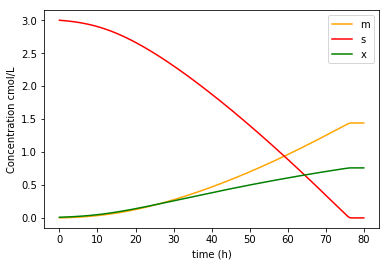

In [51]:
Co =[0.01, 90/30, 0]                # Cxo, Cso, Cmo in cmol/L
tmax=80                             # Integrate for 80 hours  
tspan=numpy.linspace(0,tmax,200)    # define the timespan of the integration
C = odeint(ferm_eq, Co, tspan)      # integration via odeint that calls upon ferm_eq

Cx, Cs, Cm = C.T

plt.plot(tspan, Cm, color='orange', label='m')
plt.plot(tspan, Cs, color='red',label='s')
plt.plot(tspan, Cx, color='green',label='x')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()



c) Now complete the table below:

<img src="table_t8.png" width="500" />

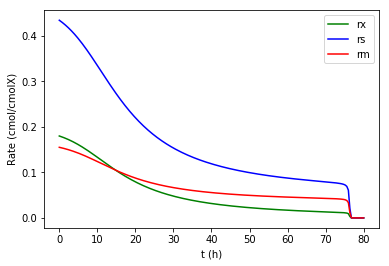

In [52]:
r = asarray([response_fun(C) for C in C]) # C is results from odeint
rx = r[:,0]
rs = r[:,1]
rm = r[:,2]
Cx = C[:,0]
Cs = C[:,1]
Cm = C[:,2]

rx_v = rx*Cx
rs_v = rs*Cx
rm_v = rm*Cx

plt.figure(2)
plt.plot(tspan, rx, color = 'green', label = 'rx')
plt.plot(tspan, -rs, color = 'blue', label = 'rs')
plt.plot(tspan, rm, color = 'red', label = 'rm')
plt.xlabel('t (h)')
plt.ylabel('Rate (cmol/cmolX)')
plt.legend(loc='best')
#plt.grid()
plt.show()



In [53]:
t = numpy.linspace(0,75,6)

for i in t:
    findCx0 = interp(i,tspan,Cx)
    print ('at t =', i,' hours, Cx = ', findCx0, 'cmolX/L')

    findCs0 = interp(i,tspan,Cs)
    print ('at t =', i,' hours, Cs = ', findCs0, 'cmolS/L')

    findCm0 = interp(i,tspan,Cm)
    print ('at t =', i,' hours, Cm = ', findCm0, 'cmolm/L')

    findrx0 = interp(i,tspan,rx)
    print ('at t =', i,' hours, rx = ', findrx0, '1/h')

    findrs0 = interp(i,tspan,rs)
    print ('at t =', i,' hours, rs = ', findrs0, 'cmols/cmolx.h')

    findrm0 = interp(i,tspan,rm)
    print ('at t =', i,' hours, rm = ', findrm0, 'cmolm/cmolx.h')

    findrx_v0 = interp(i,tspan,rx_v)
    print ('at t =', i,' hours, rx_v = ', findrx_v0, 'cmolX/L.h')

    findrs_v0 = interp(i,tspan,rs_v)
    print ('at t =', i,' hours, rx_s = ', findrs_v0, 'cmols/L.h')

    findrm_v0 = interp(i,tspan,rm_v)
    print ('at t =', i,' hours, rx_vm= ', findrm_v0, 'cmolm/L.h')
    
    print (i)
    
         

at t = 0.0  hours, Cx =  0.01 cmolX/L
at t = 0.0  hours, Cs =  3.0 cmolS/L
at t = 0.0  hours, Cm =  0.0 cmolm/L
at t = 0.0  hours, rx =  0.17976031957390146 1/h
at t = 0.0  hours, rs =  -0.43373892279952814 cmols/cmolx.h
at t = 0.0  hours, rm =  0.15493824325117234 cmolm/cmolx.h
at t = 0.0  hours, rx_v =  0.0017976031957390147 cmolX/L.h
at t = 0.0  hours, rx_s =  -0.004337389227995281 cmols/L.h
at t = 0.0  hours, rx_vm=  0.0015493824325117235 cmolm/L.h
0.0
at t = 15.0  hours, Cx =  0.08880131583847696 cmolX/L
at t = 15.0  hours, Cs =  2.801766162820689 cmolS/L
at t = 15.0  hours, Cm =  0.07331757562681161 cmolm/L
at t = 15.0  hours, rx =  0.10371777443812122 1/h
at t = 15.0  hours, rs =  -0.2721043157640983 cmols/cmolx.h
at t = 15.0  hours, rm =  0.10396027226226838 cmolm/cmolx.h
at t = 15.0  hours, rx_v =  0.009208506677559411 cmolX/L.h
at t = 15.0  hours, rx_s =  -0.024159462807802443 cmols/L.h
at t = 15.0  hours, rx_vm=  0.009230623552623935 cmolm/L.h
15.0
at t = 30.0  hours, Cx =  

Compare your $6 \times 10$ table with the one given in [Table1.xlsx](https://github.com/willienicol/Biochemical-engineering-notes/blob/master/Tutorials/Tut%208b/Table1.xlsx)

d) Plot the 3 concentration profiles against time by using a tspan of at least 200 elements. Determine the slopes of all 3 profiles at 15 and 75 hours. Use a piece of paper or a ruler against your laptop screen and determine the $\frac{\Delta C}{\Delta t}$ values. **The estimation must be a visual estimation.**

<img src="tangents.png" width="500" />

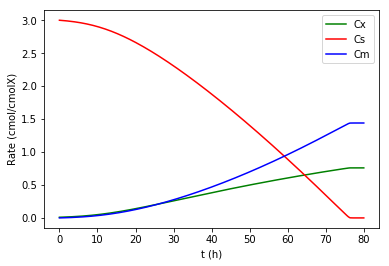

In [54]:
plt.figure(3)
plt.plot(tspan, Cx, color = 'green', label = 'Cx')
plt.plot(tspan, Cs, color = 'red', label = 'Cs')
plt.plot(tspan, Cm, color = 'blue', label = 'Cm')
plt.xlabel('t (h)')
plt.ylabel('Rate (cmol/cmolX)')
plt.legend(loc='best')
#plt.grid()
plt.show()

In [17]:
from scipy.stats import linregress 
from numpy import array

In [18]:
Cx1 = array([(interp(14,tspan,Cx)),(interp(15,tspan,Cx)),(interp(16,tspan,Cx))])
Tspan = array([14,15,16])

slope, intercept, r_value, p_value, std_err = linregress(Tspan, Cx1)

print(slope)


0.009203074537361404


In [19]:
Cs1 = array([(interp(14,tspan,Cs)),(interp(15,tspan,Cs)),(interp(16,tspan,Cs))])
Tspan1 = array([14,15,16])

slope, intercept, r_value, p_value, std_err = linregress(Tspan1, Cs1)

print(slope)

-0.024151372632562836


In [20]:
Cm1 = array([(interp(14,tspan,Cm)),(interp(15,tspan,Cm)),(interp(16,tspan,Cm))])
Tspan2 = array([14,15,16])

slope, intercept, r_value, p_value, std_err = linregress(Tspan2, Cm1)

print(slope)

0.009229286100478531


In [21]:
Cx2 = array([(interp(74,tspan,Cx)),(interp(75,tspan,Cx)),(interp(76,tspan,Cx))])
Tspan3 = array([74,75,76])

slope, intercept, r_value, p_value, std_err = linregress(Tspan3, Cx2)

print(slope)

0.00830884852644398


In [22]:
Cs2 = array([(interp(74,tspan,Cs)),(interp(75,tspan,Cs)),(interp(76,tspan,Cs))])
Tspan4 = array([74,75,76])

slope, intercept, r_value, p_value, std_err = linregress(Tspan4, Cs2)

print(slope)

-0.0535408245884114


In [23]:
Cm2 = array([(interp(74,tspan,Cm)),(interp(75,tspan,Cm)),(interp(76,tspan,Cm))])
Tspan5 = array([74,75,76])

slope, intercept, r_value, p_value, std_err = linregress(Tspan5, Cm2)

print(slope)

0.029489942825862592


e) Compare the answers in (d) to the $r_{i}^{V}$ values in your table. What do you see?

It should be the same because the units of C divided by time is $cmoli/L.h$, same as the volumetric rate for a specie.
The results from the linregress slope is very close to the calculated $r_{i}^{V}$

f) Determine the 3 concentrations at 36 hours. Use the following command before plotting the profiles and read the concentrations directly off the plot. Note the coordinates of the curser are indicated on the plot.

%matplotlib notebook 

In [24]:
print('Cs at 36h=', 2.053, 'Cx at 36h=', 0.334, 'Cm at 36h=', 0.381) #read off the graph

Cs at 36h= 2.053 Cx at 36h= 0.334 Cm at 36h= 0.381


g) Compare your visual inspected answers to the correct answers by using a tspan that contains 36 hours. For exam purpuses you should be in the range: $0.97<\frac{C_{read}}{C_{correct}}<1.03$



In [25]:
C36hrs = [[interp(36,tspan,Cx)],
       [interp(36,tspan,Cs)],
       [interp(36,tspan,Cm)]]

C36hrs

[[0.3338167657253419], [2.0572248063007477], [0.38673361072457924]]

h) Obtain the values of $r_X,r_S,r_M$ at 36 hours. [0.0369, -0.1300,  0.0592]

In [26]:
r36hrs = [[interp(36,tspan,rx)],
       [interp(36,tspan,rs)],
       [interp(36,tspan,rm)]]

r36hrs

[[0.036909835679478156], [-0.13007625421552935], [0.059158158836342525]]

i) What will $r_X,r_S,r_M$ be at 36 hours if $C_M$ was 0.75 $\frac{cmol}{L}$ more than the coordinate in (e)? The other concentrations remain the same. **perform calculation without integration!** [0.0145, -0.0825, 0.04415]

<img src="notonprofile.png" width="400" />

In [27]:
rates36 = response_fun([0.3338167657253419,2.0572248063007477,1.13673
])
rates36

[0.014526266292799848, -0.08249959184529607, 0.04415344906490682]